In [29]:
import numpy as np

from scipy.io import loadmat

import pandas as pd

from numpy.linalg import eig

import matplotlib.pyplot as plt

In [30]:
data = loadmat( 'Databases/breastCancer.mat' )

In [31]:
X = data['X']

y = data['Y']

In [32]:
print( X.shape )

print( y.shape )

(569, 30)
(569, 1)


In [33]:
# PCA and correctness

In [34]:
class PC() :
    
    
    def __init__( self, no_of_components ) :
        
        self.no_of_components = no_of_components
        
    
    # -------------pca algorithm----------------
    
    
    def transformation( self, X ) :
        
        # centralize
    
        mean = np.mean( X, 0 )
        
        X_stand = X - mean
    
        # calculate co-variance matrix
    
        X_cov = np.cov( np.transpose( X_stand ) )
    
        # find the eigenvalues and eigenvectors
    
        e, V = eig( X_cov )
    
        # select the principal components 
        
        idx = np.argsort( e )

        e = e[idx]

        V = V[:,idx]
        
        m, n = V.shape
        
        p = V[:, m - self.no_of_components : ]
    
        # project the original dataset
    
        X_transform = np.dot( X_stand, p )
        
        return X_transform

In [35]:
model1 = PC( no_of_components = 2 )

X_transform1 = model1.transformation( X )

In [36]:
X_transform1.shape

(569, 2)

Text(0, 0.5, 'PC2')

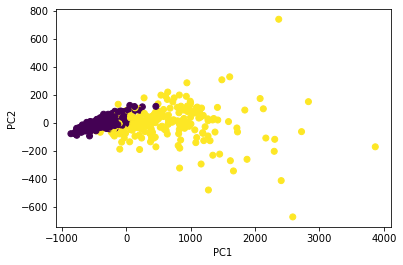

In [37]:
plt.scatter( X_transform1[:, 1], X_transform1[:, 0], c = y )

plt.xlabel( "PC1" )

plt.ylabel( "PC2" )

In [38]:
from sklearn.decomposition import PCA

model2 = PCA( n_components = 2 )

X_transform2 = model2.fit_transform( X )

Text(0, 0.5, 'PC2')

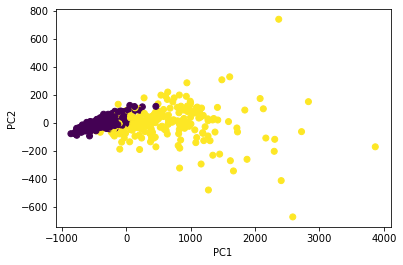

In [39]:
plt.scatter( X_transform2[:, 0], X_transform2[:, 1], c = y )

plt.xlabel( "PC1" )

plt.ylabel( "PC2" )

In [40]:
# Logistic Regression

In [41]:
class LogitRegression() :
    
    def __init__( self, learning_rate, iterations ) :        
        
        self.learning_rate = learning_rate        
        
        self.iterations = iterations
          
    # Function for model training    
    
    def fit( self, X, Y ) :        
        
        # no_of_training_examples, no_of_features        
        
        self.m, self.n = X.shape        
        
        # weight initialization        
        
        self.W = np.zeros( self.n )        
        
        self.b = 0        
        
        self.X = X        
        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            
            self.update_weights()            
        
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
          
        # calculate gradients        
        
        tmp = ( A - self.Y.T )        
        
        tmp = np.reshape( tmp, self.m )        
        
        dW = np.dot( self.X.T, tmp ) / self.m         
        
        db = np.sum( tmp ) / self.m 
          
        # update weights    
        
        self.W = self.W - self.learning_rate * dW    
        
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :    
        
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        
        Y = np.where( Z > 0.5, 1, 0 )        
        
        return Y

In [44]:
# K Nearest Neighbors Classification

In [45]:
class K_Nearest_Neighbors_Classifier() : 
    
    def __init__( self, K ) :
        
        self.K = K
        
    # Function to store training set
        
    def fit( self, X_train, Y_train ) :
        
        self.X_train = X_train
        
        self.Y_train = Y_train
        
        # no_of_training_examples, no_of_features
        
        self.m, self.n = X_train.shape
    
    # Function for prediction
        
    def predict( self, X_test ) :
        
        self.X_test = X_test
        
        # no_of_test_examples, no_of_features
        
        self.m_test, self.n = X_test.shape
        
        # initialize Y_predict
        
        Y_predict = np.zeros( self.m_test )
        
        for i in range( self.m_test ) :
            
            x = self.X_test[i]
            
            # find the K nearest neighbors from current test example
            
            neighbors = np.zeros( self.K )
            
            neighbors = self.find_neighbors( x )
            
            # most frequent class in K neighbors
            
            Y_predict[i] = mode( neighbors )[0][0]    
            
        return Y_predict
    
    # Function to find the K nearest neighbors to current test example
          
    def find_neighbors( self, x ) :
        
        # calculate all the euclidean distances between current test example x and training set X_train
        
        euclidean_distances = np.zeros( self.m )
        
        for i in range( self.m ) :
            
            d = self.euclidean( x, self.X_train[i] )
            
            euclidean_distances[i] = d
        
        # sort Y_train according to euclidean_distance_array and store into Y_train_sorted
        
        inds = euclidean_distances.argsort()
        
        Y_train_sorted = self.Y_train[inds]
        
        return Y_train_sorted[:self.K]
    
    # Function to calculate euclidean distance
            
    def euclidean( self, x, x_train ) :
        
        return np.sqrt( np.sum( np.square( x - x_train ) ) )

In [46]:
# Fisher Linear Discriminant Analysis

In [89]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = size )